/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


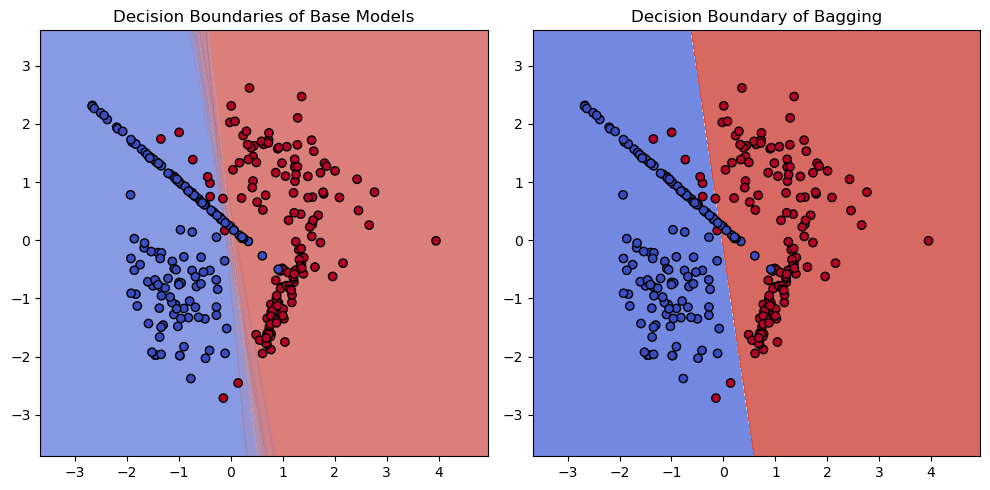

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bagging Classifier with Logistic Regression as the base model
bagging_clf = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)

# Plot decision boundaries of all base models
plt.figure(figsize=(10, 5))

# Define mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Plot each base estimator's decision boundary
plt.subplot(1, 2, 1)
for estimator in bagging_clf.estimators_:
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.1, cmap=plt.cm.coolwarm)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("Decision Boundaries of Base Models")

# Plot decision boundary of the Bagging classifier
Z = bagging_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary of Bagging")

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


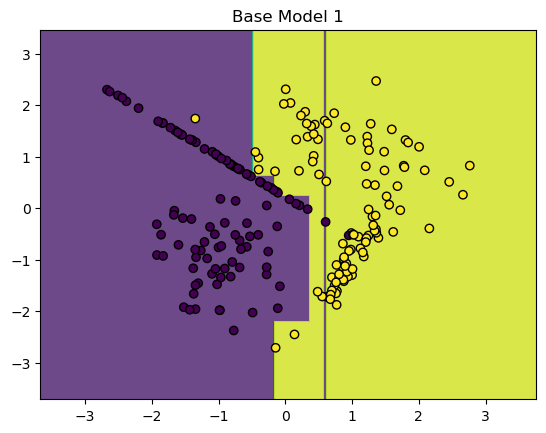

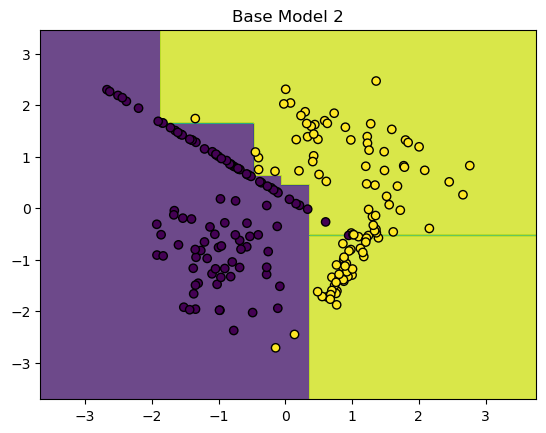

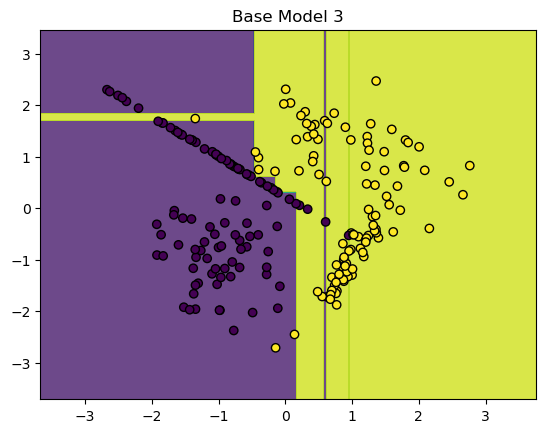

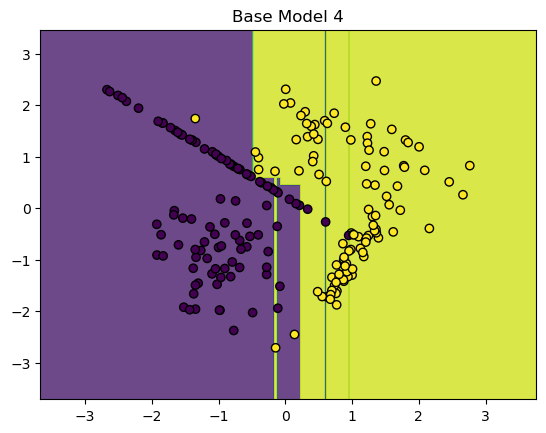

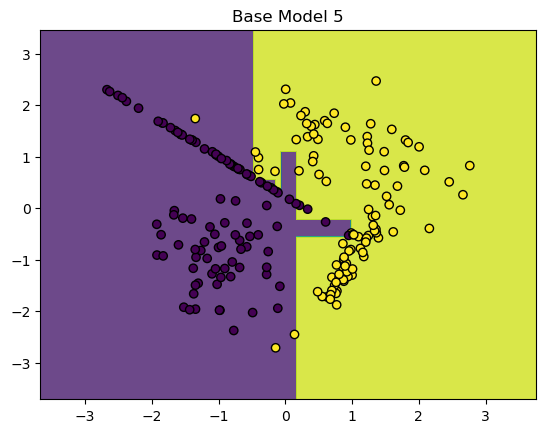

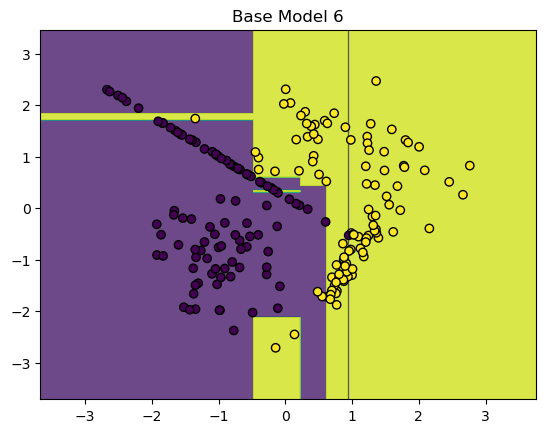

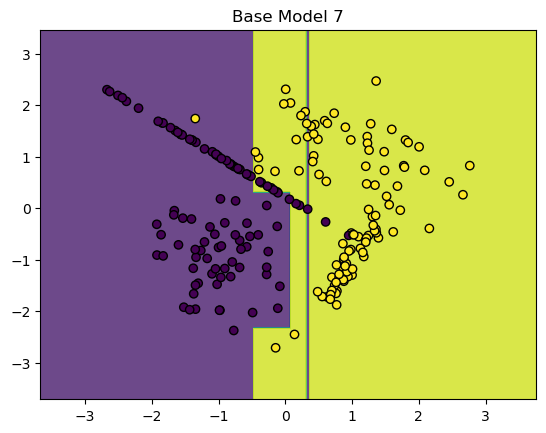

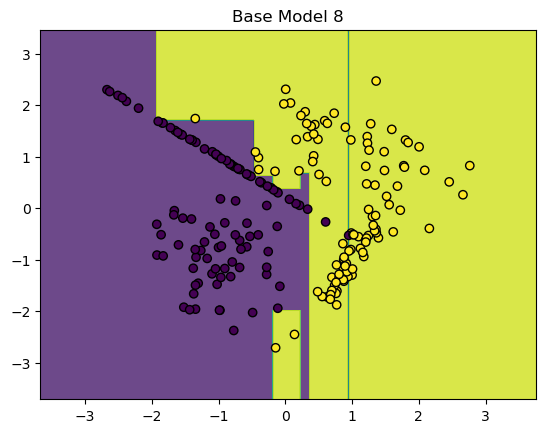

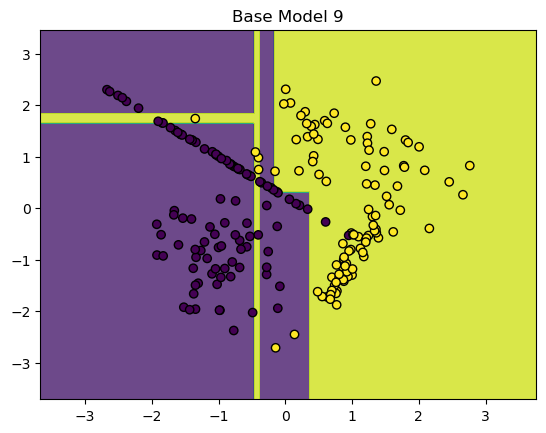

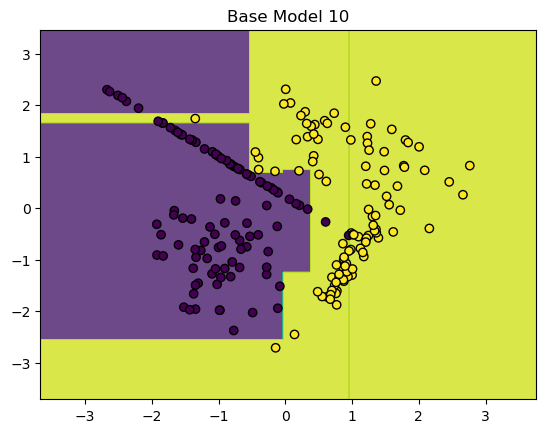

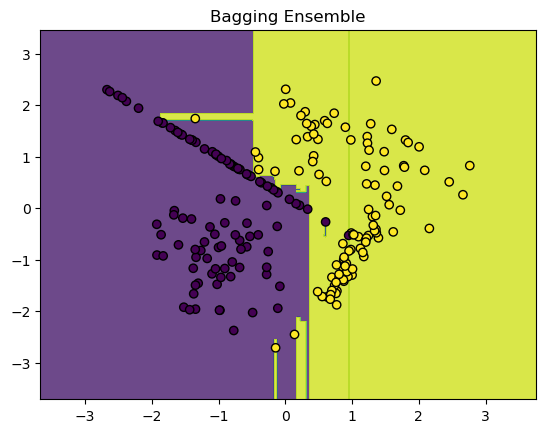

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Bagging ensemble with Decision Trees
base_model = DecisionTreeClassifier()
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Plotting the decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Plot decision boundaries for base models
for i, estimator in enumerate(bagging_model.estimators_):
    plot_decision_boundary(estimator, X_train, y_train, f"Base Model {i+1}")

# Plot decision boundary for bagging ensemble
plot_decision_boundary(bagging_model, X_train, y_train, "Bagging Ensemble")
